In [1]:
from utils import setrootdir
setrootdir("ppgcc-coautorias")

'Directory ppgcc-coautorias successfully loaded as current working directory.'

In [2]:
import os
import pickle
from pathlib import Path
from itertools import combinations, chain
from collections import Counter

from dotenv import load_dotenv

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

import seaborn as sns
import plotly.graph_objects as go

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

from src.utils import get_colors, combine_rgb

sns.set_style("whitegrid")

# 3. Visualization

In [3]:
load_dotenv()

DATASET_DIRECTORY = os.getenv("DATASET_DIRECTORY")

In [4]:
preprocessing_directory = Path(DATASET_DIRECTORY, "02-preprocessing")

with open(Path(preprocessing_directory, "productions.pickle"), "rb") as f:
    df_productions = pickle.load(f)

df_productions

,production_id,name,citation,lattes_id,institution,production,authors,location,type,year,issn
0,0,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Designing collaboration through a web-based gr...,"[Jose Maria Nazar David, Marcos Roberto da Sil...",International Journal of Computer Applications...,PERIODICO,2004,09528091
1,1,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Supporting Awareness in Groupware through an A...,"[Rita Suzana Pitangueira Maciel, Jose Maria Na...",JOURNAL OF UNIVERSAL COMPUTER SCIENCE,PERIODICO,2009,0948695X
2,2,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Management of Scientific Experiments in Comput...,"[Regina Maria Maciel Braga, Fernanda Cláudia A...",iSys - Revista Brasileira de Sistemas de Infor...,PERIODICO,2012,19842902
3,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,"[Wander Gaspar, Regina Maria Maciel Braga, Fer...","International Journal of Metadata, Semantics a...",PERIODICO,2015,17442621
4,4,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,PERSONNA: proposta de ontologia de contexto e ...,"[Paulo Rezende, Crystiam Kelle Pereira, Fernan...",Revista Brasileira de Informática na Educação,PERIODICO,2015,14145685
...,...,...,...,...,...,...,...,...,...,...,...
230912,230926,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,Pruning Weightless Neural Networks,"[Zachary Susskind, Igor Dantas Dos Santos Mira...",30th European Symposium on Artificial Neural N...,CONFERENCIA,2022,None
230913,230927,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,GSink - A Runtime for Gamma Programs and its C...,"[MELLO, RUI R., Gabriel Antoine Louis Paillard...",2023 IEEE International Parallel and Distribut...,CONFERENCIA,2023,None
230914,230928,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,Heuristics for t-admissibility with complex ne...,"[Carlos Thadeu Duarte Santos, Anderson Zudio, ...",SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None
230915,230929,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,Gerando base de grafos não isomorfos com seus ...,"[Felipe Souza, Leandro Santiago de Araujo, Luí...",SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None


In [5]:
visualization_directory = Path(DATASET_DIRECTORY, "04-visualization")
Path(visualization_directory).mkdir(parents=True, exist_ok=True)

## 3.1. PPGCC-UFPA data between 2014-2023

In [6]:
df_ufpa = df_productions[df_productions["institution"] == "UFPA"]
df_ufpa = df_ufpa[(df_ufpa["year"] >= 2014) & (df_ufpa["year"] <= 2023)]
df_ufpa

,production_id,name,citation,lattes_id,institution,production,authors,location,type,year,issn
123855,123858,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,A Method for Locating Multiple Intruders with ...,"[ARAÚJO, RAMON C.F., DE OLIVEIRA, RODRIGO M.S....",Applied Mathematical Modelling,PERIODICO,2015,0307904X
123856,123859,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,An Efficient Global Memory Addressing Techniqu...,"[Elisson E S Andrade, Rodrigo M. S. Oliveira, ...",INTERNATIONAL JOURNAL OF EMERGING TECHNOLOGY A...,PERIODICO,2017,22502459
123857,123860,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,Desafios do Uso da Tecnologia como Recurso Ped...,"[Maria José Menineá Duarte, João Batista Santi...",Brazilian Journal of Development,PERIODICO,2019,25258761
123858,123861,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,Game development as a pedagogical mechanism: a...,"[DAS MERCÊS SILVA, SARA, PANTOJA O. ARAUJO, FA...",RENOTE. REVISTA NOVAS TECNOLOGIAS NA EDUCAÇÃO,PERIODICO,2020,16791916
123859,123862,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,Um Mapeamento da Literatura sobre o Uso de Met...,"[Flávio Ramon Almeida de Souza, Marcos Rodrigo...",RENOTE. REVISTA NOVAS TECNOLOGIAS NA EDUCAÇÃO,PERIODICO,2023,16791916
...,...,...,...,...,...,...,...,...,...,...,...
127904,127907,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,Resilient Routing for SDM-EON as a Crucial Ena...,"[Rafael da Silva Lopes, Helder May Nunes da Si...",SIMPÓSIO BRASILEIRO DE REDES DE COMPUTADORES E...,CONFERENCIA,2023,None
127905,127908,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,"Backup, Routing, Modulation, Spectrum and Core...","[Helder May Nunes da Silva Oliveira, Nelson Lu...",2022 IEEE LatinAmerican Conference on Communic...,CONFERENCIA,2022,None
127906,127909,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,Resilient Routing and Resource Allocation in S...,"[Helder May Nunes da Silva Oliveira, Nelson Lu...",2022 IEEE LatinAmerican Conference on Communic...,CONFERENCIA,2022,None
127907,127910,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,Resilient Routing for SDM-EON as a Crucial Ena...,"[LOPES, RAFAEL S., Eduardo Coelho Cerqueira, D...",2022 IEEE Conference on Network Function Virtu...,CONFERENCIA,2022,None


## 3.2. Yearly publications

In [7]:
df_yearly = df_ufpa[["year", "type"]]
df_yearly = df_yearly[df_yearly["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_yearly = df_yearly.groupby(["year", "type"]).size().reset_index(name='count')
df_yearly = df_yearly.pivot(index="year", columns="type", values="count")
df_yearly

type,CONFERENCIA,PERIODICO
year,,
2014,109,59
2015,96,59
2016,113,79
2017,98,56
2018,150,57
2019,205,73
2020,151,76
2021,136,104
2022,138,85


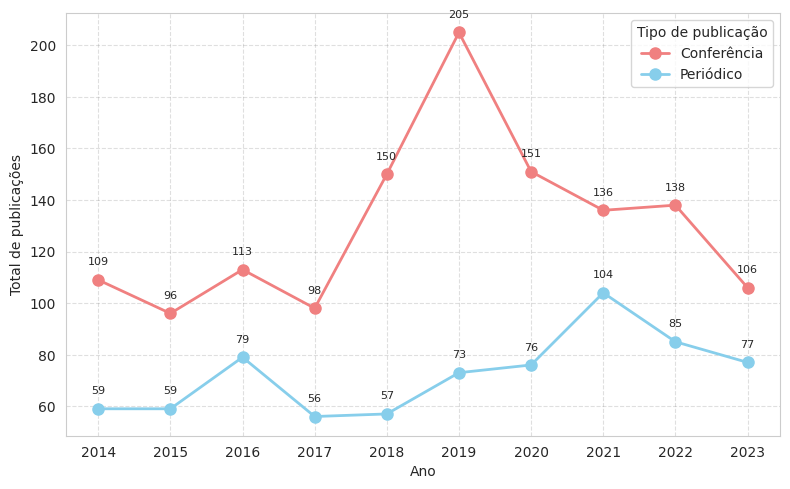

In [8]:
fig_yearly_pub, ax_yearly_pub = plt.subplots(figsize=(8, 5))
df_yearly.plot(kind="line", ax=ax_yearly_pub, color=["lightcoral", "skyblue"], marker='o', linewidth=2, markersize=8)

ax_yearly_pub.set_xlabel("Ano")
ax_yearly_pub.set_ylabel("Total de publicações")
ax_yearly_pub.legend(title="Tipo de publicação", labels=["Conferência", "Periódico"])

for line in ax_yearly_pub.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax_yearly_pub.text(x, y+5, f"{y}", fontsize=8, ha='center', va='bottom')

ax_yearly_pub.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_pub.xaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)

ax_yearly_pub.set_xticks(df_yearly.index)
ax_yearly_pub.set_xticklabels(df_yearly.index, rotation=0)

plt.tight_layout()

plt.savefig(Path(visualization_directory, "yearly_publications.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications.pdf"), format='pdf', bbox_inches='tight')

plt.show()

### 3.2.1. Yearly publications by institution

In [9]:
df_yearly_all = df_productions.copy()
df_yearly_all = df_yearly_all[(df_yearly_all["year"] >= 2014) & (df_yearly_all["year"] <= 2023)]
df_yearly_all = df_yearly_all[["year", "type"]]
df_yearly_all = df_yearly_all[df_yearly_all["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_yearly_all = df_yearly_all.groupby(["year", "type"]).size().reset_index(name='count')
df_yearly_all = df_yearly_all.pivot(index="year", columns="type", values="count")
df_yearly_all

type,CONFERENCIA,PERIODICO
year,,
2014,6232,2549
2015,6176,2670
2016,6270,3065
2017,6212,3066
2018,6654,3276
2019,6466,3494
2020,5743,4129
2021,5293,4319
2022,4569,3975


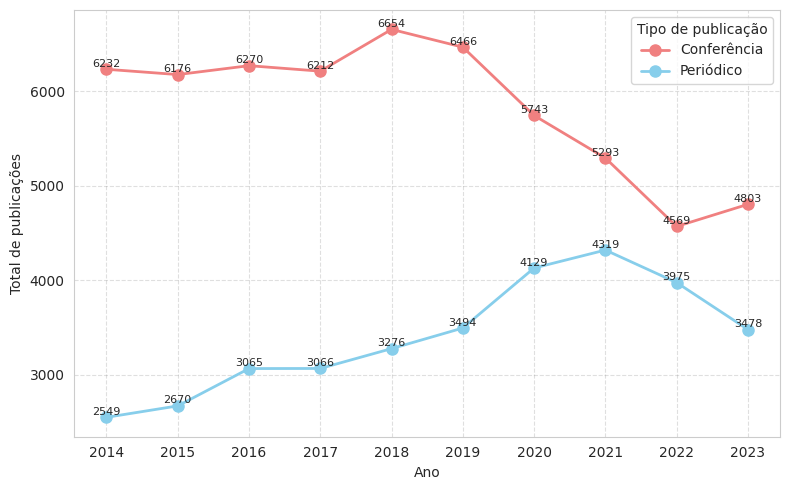

In [10]:
fig_yearly_pub_all, ax_yearly_pub_all = plt.subplots(figsize=(8, 5))
df_yearly_all.plot(kind="line", ax=ax_yearly_pub_all, color=["lightcoral", "skyblue"], marker='o', linewidth=2, markersize=8)

ax_yearly_pub_all.set_xlabel("Ano")
ax_yearly_pub_all.set_ylabel("Total de publicações")
ax_yearly_pub_all.legend(title="Tipo de publicação", labels=["Conferência", "Periódico"])

for line in ax_yearly_pub_all.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax_yearly_pub_all.text(x, y+5, f"{y}", fontsize=8, ha='center', va='bottom')

ax_yearly_pub_all.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_pub_all.xaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)

ax_yearly_pub_all.set_xticks(df_yearly_all.index)
ax_yearly_pub_all.set_xticklabels(df_yearly_all.index, rotation=0)

plt.tight_layout()

plt.savefig(Path(visualization_directory, "yearly_publications_all.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications_all.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications_all.pdf"), format='pdf', bbox_inches='tight')

plt.show()

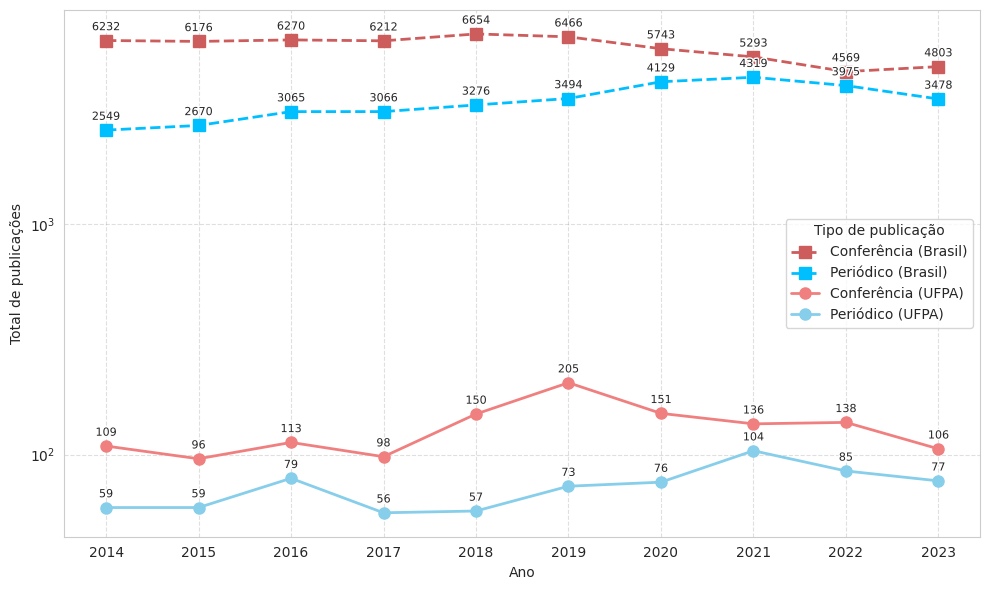

In [11]:
fig_yearly_pub_combined, ax_yearly_pub_combined = plt.subplots(figsize=(10, 6))

df_yearly_all.plot(kind="line", ax=ax_yearly_pub_combined, color=["indianred", "deepskyblue"], marker='s', linewidth=2, markersize=8, linestyle='--', label=['Conferência (Brasil)', 'Periódico (Brasil)'])
df_yearly.plot(kind="line", ax=ax_yearly_pub_combined, color=["lightcoral", "skyblue"], marker='o', linewidth=2, markersize=8, linestyle='-', label=['Conferência (UFPA)', 'Periódico (UFPA)'])

ax_yearly_pub_combined.set_xlabel("Ano")
ax_yearly_pub_combined.set_ylabel("Total de publicações")
ax_yearly_pub_combined.legend(title="Tipo de publicação", labels=["Conferência (Brasil)", "Periódico (Brasil)", "Conferência (UFPA)", "Periódico (UFPA)"])

# for line in ax_yearly_pub_combined.get_lines():
#     for x, y in zip(line.get_xdata(), line.get_ydata()):
#         ax_yearly_pub_combined.text(x, y+10, f"{y}", fontsize=8, ha='center', va='bottom')

ax_yearly_pub_combined.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_pub_combined.xaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)

ax_yearly_pub_combined.set_xticks(df_yearly.index)
ax_yearly_pub_combined.set_xticklabels(df_yearly.index, rotation=0)

ax_yearly_pub_combined.set_yscale('log')

for line in ax_yearly_pub_combined.get_lines():
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for x, y in zip(xdata, ydata):
        if y is None or y <= 0:
            continue
        ax_yearly_pub_combined.annotate(
            f"{int(y)}" if float(y).is_integer() else f"{y}",
            xy=(x, y),
            xytext=(0, 6),
            textcoords="offset points",
            ha="center", va="bottom",
            fontsize=8,
            path_effects=[pe.withStroke(linewidth=2, foreground="white")]
        )

plt.tight_layout()

plt.savefig(Path(visualization_directory, "yearly_publications_combined.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications_combined.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications_combined.pdf"), format='pdf', bbox_inches='tight')
plt.show()

## 3.3. Yearly coauthorship

In [12]:
df_yearly_coauthorship = df_ufpa[["name", "year", "authors", "type"]]
df_yearly_coauthorship["coauthors"] = df_yearly_coauthorship.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
df_yearly_coauthorship["n_coauthors"] = df_yearly_coauthorship["coauthors"].apply(len)
df_yearly_coauthorship = df_yearly_coauthorship[df_yearly_coauthorship["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_yearly_coauthorship = df_yearly_coauthorship[["year", "type", "n_coauthors"]]
df_yearly_coauthorship = df_yearly_coauthorship.groupby(["year", "type"])["n_coauthors"].sum().reset_index()
df_yearly_coauthorship = df_yearly_coauthorship.pivot(index="year", columns="type", values="n_coauthors")
df_yearly_coauthorship

/tmp/ipykernel_4314/325004048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_coauthorship["coauthors"] = df_yearly_coauthorship.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
/tmp/ipykernel_4314/325004048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_coauthorship["n_coauthors"] = df_yearly_coauthorship["coauthors"].apply(len)


type,CONFERENCIA,PERIODICO
year,,
2014,407,410
2015,386,386
2016,445,472
2017,346,339
2018,580,317
2019,723,367
2020,565,415
2021,449,653
2022,426,472


/tmp/ipykernel_4314/3825691080.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_coauth.set_xticklabels(ax_yearly_coauth.get_xticklabels(), rotation=0)


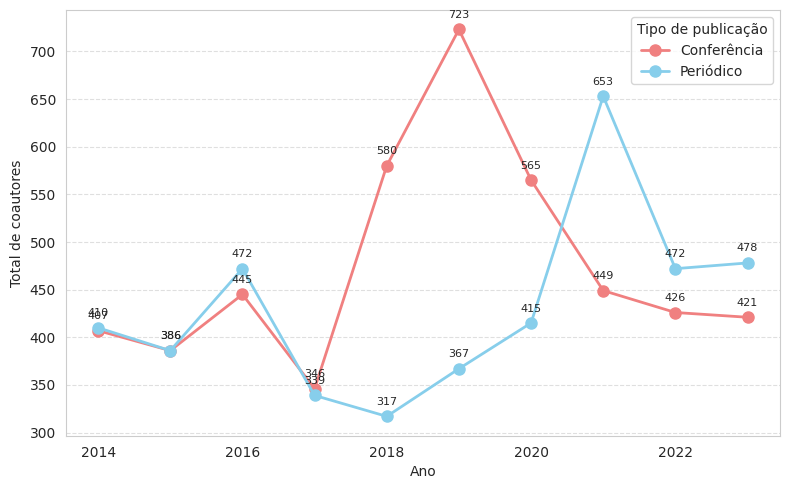

In [13]:
fig_yearly_coauth, ax_yearly_coauth = plt.subplots(figsize=(8, 5))

df_yearly_coauthorship.plot(
    kind="line",
    ax=ax_yearly_coauth, 
    color=["lightcoral", "skyblue"], marker='o', linewidth=2, markersize=8
)

ax_yearly_coauth.set_xlabel("Ano")
ax_yearly_coauth.set_ylabel("Total de coautores")
ax_yearly_coauth.legend(title="Tipo de publicação", labels=["Conferência", "Periódico"])

for line in ax_yearly_coauth.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax_yearly_coauth.text(x, y+10, f"{y}", fontsize=8, ha='center', va='bottom')

# for container in ax_yearly_coauth.containers:
    # ax_yearly_coauth.bar_label(container, fmt='%d', fontsize=8, padding=2)

ax_yearly_coauth.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_coauth.xaxis.grid(False)

ax_yearly_coauth.set_xticklabels(ax_yearly_coauth.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(Path(visualization_directory, "yearly_coauthorship.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship.pdf"), format='pdf', bbox_inches='tight')
plt.show()

In [14]:
df_yearly_coauthorship_all = df_productions.copy()
df_yearly_coauthorship_all = df_yearly_coauthorship_all[(df_yearly_coauthorship_all["year"] >= 2014) & (df_yearly_coauthorship_all["year"] <= 2023)]
df_yearly_coauthorship_all = df_yearly_coauthorship_all[["name", "year", "authors", "type"]]
df_yearly_coauthorship_all["coauthors"] = df_yearly_coauthorship_all.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
df_yearly_coauthorship_all["n_coauthors"] = df_yearly_coauthorship_all["coauthors"].apply(len)
df_yearly_coauthorship_all = df_yearly_coauthorship_all[df_yearly_coauthorship_all["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_yearly_coauthorship_all = df_yearly_coauthorship_all[["year", "type", "n_coauthors"]]
df_yearly_coauthorship_all = df_yearly_coauthorship_all.groupby(["year", "type"])["n_coauthors"].sum().reset_index()
df_yearly_coauthorship_all = df_yearly_coauthorship_all.pivot(index="year", columns="type", values="n_coauthors")
df_yearly_coauthorship_all

type,CONFERENCIA,PERIODICO
year,,
2014,19211,9018
2015,19042,9118
2016,20224,10898
2017,20029,10770
2018,22233,11537
2019,21838,13275
2020,19978,16857
2021,18522,18513
2022,16558,17106


/tmp/ipykernel_4314/4041715016.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_coauth_all.set_xticklabels(ax_yearly_coauth_all.get_xticklabels(), rotation=0)


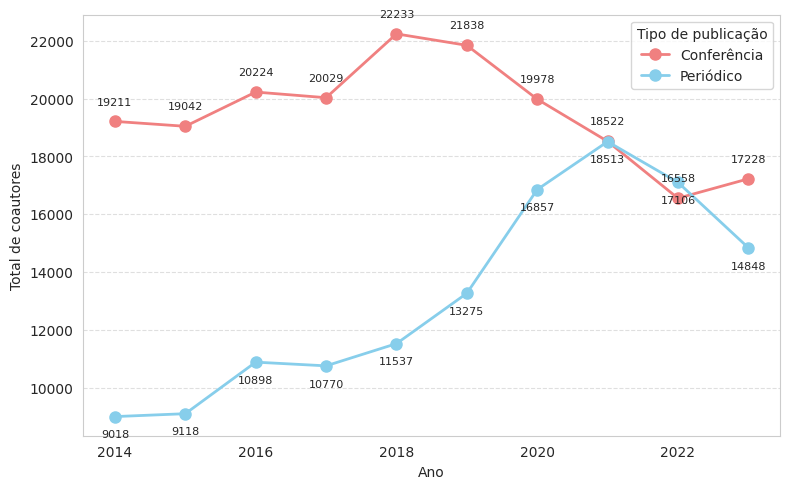

In [15]:
fig_yearly_coauth_all, ax_yearly_coauth_all = plt.subplots(figsize=(8, 5))

df_yearly_coauthorship_all.plot(
    kind="line", 
    ax=ax_yearly_coauth_all, 
    color=["lightcoral", "skyblue"], marker='o', linewidth=2, markersize=8
)

ax_yearly_coauth_all.set_xlabel("Ano")
ax_yearly_coauth_all.set_ylabel("Total de coautores")
ax_yearly_coauth_all.legend(title="Tipo de publicação", labels=["Conferência", "Periódico"])

for line in ax_yearly_coauth_all.get_lines():
    label = line.get_label()
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if label == "CONFERENCIA":
            ax_yearly_coauth_all.text(x, y+500, f"{y}", fontsize=8, ha='center', va='bottom')
        elif label == "PERIODICO":
            ax_yearly_coauth_all.text(x, y-800, f"{y}", fontsize=8, ha='center', va='bottom')

ax_yearly_coauth_all.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_coauth_all.xaxis.grid(False)

ax_yearly_coauth_all.set_xticklabels(ax_yearly_coauth_all.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(Path(visualization_directory, "yearly_coauthorship_all.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship_all.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship_all.pdf"), format='pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_4314/340113277.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_coauth_combined.set_xticklabels(ax_yearly_coauth_combined.get_xticklabels(), rotation=0)


CONFERENCIA
PERIODICO
CONFERENCIA
PERIODICO


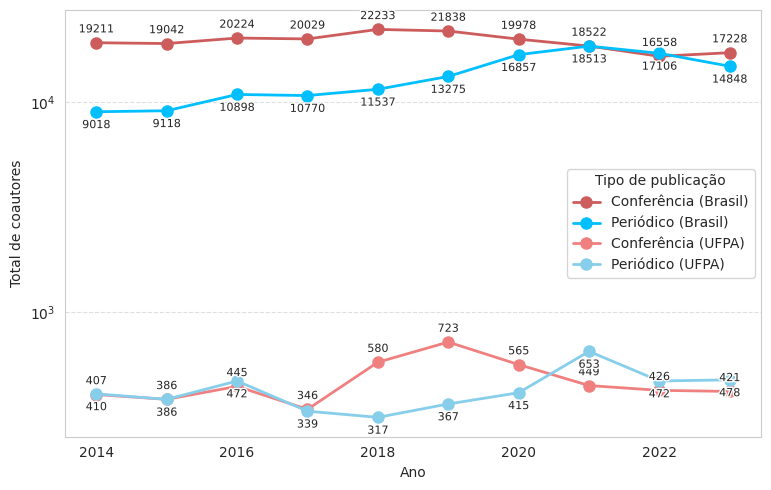

In [16]:
fig_yearly_coauth_combined, ax_yearly_coauth_combined = plt.subplots(figsize=(8, 5))

df_yearly_coauthorship_all.plot(
    kind="line", 
    ax=ax_yearly_coauth_combined, 
    color=["indianred", "deepskyblue"],
    label=['Conferência (Brasil)', 'Periódico (Brasil)'],
    marker='o', linewidth=2, markersize=8
)

df_yearly_coauthorship.plot(
    kind="line", 
    ax=ax_yearly_coauth_combined, 
    color=["lightcoral", "skyblue"],
    label=['Conferência (UFPA)', 'Periódico (UFPA)'],
    marker='o', linewidth=2, markersize=8
)

ax_yearly_coauth_combined.set_xlabel("Ano")
ax_yearly_coauth_combined.set_ylabel("Total de coautores")
ax_yearly_coauth_combined.legend(title="Tipo de publicação", labels=["Conferência (Brasil)", "Periódico (Brasil)", "Conferência (UFPA)", "Periódico (UFPA)"])

# for container in ax_yearly_coauth_combined.containers:
#     ax_yearly_coauth_combined.bar_label(container, fmt='%d', fontsize=8, padding=2)

ax_yearly_coauth_combined.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_coauth_combined.xaxis.grid(False)
ax_yearly_coauth_combined.set_xticklabels(ax_yearly_coauth_combined.get_xticklabels(), rotation=0)

plt.tight_layout()

ax_yearly_coauth_combined.set_yscale('log')

for line in ax_yearly_coauth_combined.get_lines():
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    label = line.get_label()
    print(label)
    for x, y in zip(xdata, ydata):
        if y is None or y <= 0:
            continue
        if label == "CONFERENCIA":
            ax_yearly_coauth_combined.annotate(
                f"{int(y)}" if float(y).is_integer() else f"{y}",
                xy=(x, y),
                xytext=(0, 6),
                textcoords="offset points",
                ha="center", va="bottom",
                fontsize=8,
                path_effects=[pe.withStroke(linewidth=2, foreground="white")]
            )
        elif label == "PERIODICO":
            ax_yearly_coauth_combined.annotate(
                f"{int(y)}" if float(y).is_integer() else f"{y}",
                xy=(x, y),
                xytext=(0, -6),
                textcoords="offset points",
                ha="center", va="top",
                fontsize=8,
                path_effects=[pe.withStroke(linewidth=2, foreground="white")]
            )

plt.savefig(Path(visualization_directory, "yearly_coauthorship_combined.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship_combined.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship_combined.pdf"), format='pdf', bbox_inches='tight')
plt.show()

## 3.4. Coauthorships by professor

In [17]:
df_coauth_professors = df_ufpa[["name", "authors"]]
df_coauth_professors["coauthors"] = df_coauth_professors.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
df_coauth_professors = df_coauth_professors[["name", "coauthors"]]
df_coauth_professors = df_coauth_professors.explode("coauthors")
df_coauth_professors = df_coauth_professors.drop_duplicates(subset=["name", "coauthors"])
df_coauth_professors = df_coauth_professors.groupby(by="name").size().reset_index(name="n_coauthorships")
df_coauth_professors = df_coauth_professors.sort_values(by="n_coauthorships", ascending=False)
df_coauth_professors

/tmp/ipykernel_4314/1004289072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coauth_professors["coauthors"] = df_coauth_professors.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)


,name,n_coauthorships
24,Rommel Thiago Juca Ramos,744
17,Joao Crisóstomo Weyl Albuquerque Costa,353
14,Gustavo Pessin,343
25,Ronnie Cley de Oliveira Alves,292
9,Eduardo Coelho Cerqueira,292
8,Denis Lima do Rosário,241
26,Sandro Ronaldo Bezerra Oliveira,222
7,Cleidson Ronald Botelho de Souza,217
5,Carlos Renato Lisboa Francês,208
0,Aldebaro Barreto da Rocha Klautau Júnior,201


/tmp/ipykernel_4314/2732738370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_coauth_professors, x="n_coauthorships", y="name", ax=ax_coauth_prof, palette="viridis")


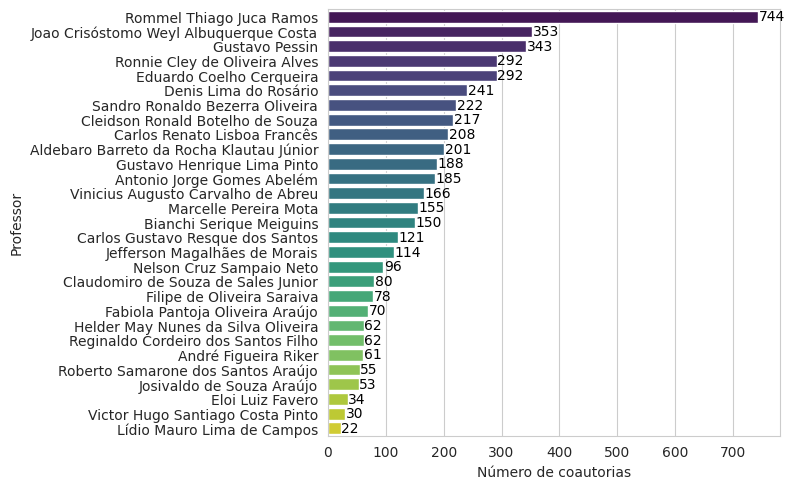

In [18]:
fig_coauth_prof, ax_coauth_prof = plt.subplots(figsize=(8, 5))

sns.barplot(data=df_coauth_professors, x="n_coauthorships", y="name", ax=ax_coauth_prof, palette="viridis")

for index, value in enumerate(df_coauth_professors["n_coauthorships"]):
    ax_coauth_prof.text(value + 1, index, str(value), color='black', va='center')

ax_coauth_prof.set_xlabel("Número de coautorias")
ax_coauth_prof.set_ylabel("Professor")

plt.tight_layout()

plt.savefig(Path(visualization_directory, "coauthorships_per_professor.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorships_per_professor.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorships_per_professor.pdf"), format='pdf', bbox_inches='tight')

plt.show()

## 3.5. Publications by professor

In [19]:
df_pub_by_prof = df_ufpa[["name", "type"]]
df_pub_by_prof = df_pub_by_prof[df_pub_by_prof["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_pub_by_prof = df_pub_by_prof.groupby(["name", "type"]).size().reset_index(name="count")
df_pub_by_prof = df_pub_by_prof.pivot(index="name", columns="type", values="count").fillna(0)
df_pub_by_prof["total"] = df_pub_by_prof.sum(axis=1)
df_pub_by_prof = df_pub_by_prof.sort_values(by=["total", "PERIODICO", "CONFERENCIA"], ascending=False).reset_index()
df_pub_by_prof

type,name,CONFERENCIA,PERIODICO,total
0,Sandro Ronaldo Bezerra Oliveira,209,25,234
1,Eduardo Coelho Cerqueira,111,68,179
2,Joao Crisóstomo Weyl Albuquerque Costa,93,76,169
3,Denis Lima do Rosário,97,50,147
4,Gustavo Pessin,72,53,125
5,Rommel Thiago Juca Ramos,1,114,115
6,Aldebaro Barreto da Rocha Klautau Júnior,65,32,97
7,Carlos Renato Lisboa Francês,34,53,87
8,Gustavo Henrique Lima Pinto,61,26,87
9,Cleidson Ronald Botelho de Souza,65,20,85


In [20]:
df_pub_by_prof.to_csv(Path(visualization_directory, "publications_per_professor.csv"), index=False)

/tmp/ipykernel_4314/3299073678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pub_by_prof, x="total", y="name", ax=ax_pub_prof, palette="viridis")


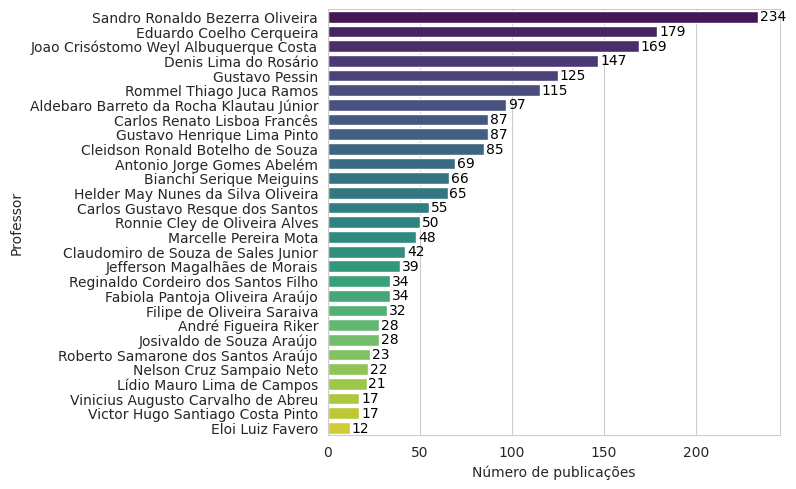

In [21]:
fig_pub_prof, ax_pub_prof = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_pub_by_prof, x="total", y="name", ax=ax_pub_prof, palette="viridis")

for index, value in enumerate(df_pub_by_prof["total"]):
    ax_pub_prof.text(value + 1, index, str(value), color='black', va='center')

ax_pub_prof.set_xlabel("Número de publicações")
ax_pub_prof.set_ylabel("Professor")

plt.tight_layout()

plt.savefig(Path(visualization_directory, "publications_per_professor.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.pdf"), format='pdf', bbox_inches='tight')

plt.show()

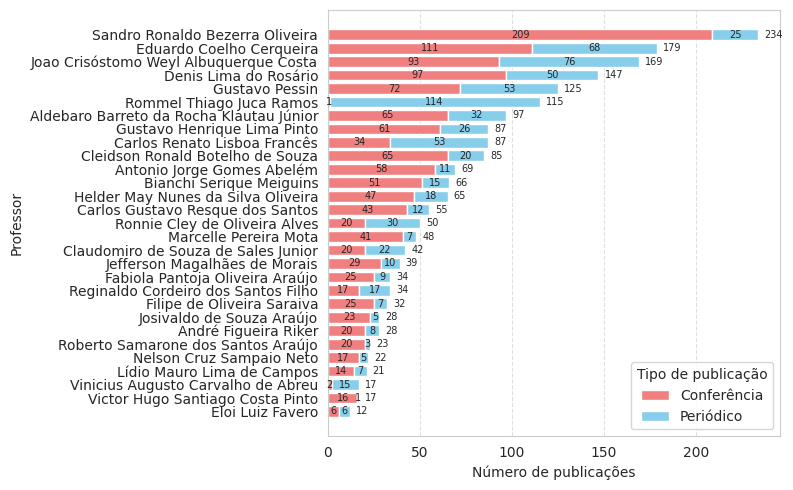

In [22]:
df_pub_by_prof = df_pub_by_prof.sort_values("total", ascending=True)

y = range(len(df_pub_by_prof))
conf = df_pub_by_prof["CONFERENCIA"].to_numpy()
peri = df_pub_by_prof["PERIODICO"].to_numpy()
labels = df_pub_by_prof["name"].tolist()
totals = (conf + peri)

fig_pub_prof, ax_pub_prof = plt.subplots(figsize=(8, 5))

bars_conf = ax_pub_prof.barh(y, conf, color="lightcoral", label="Conferência")
bars_peri = ax_pub_prof.barh(y, peri, left=conf, color="skyblue", label="Periódico")


ax_pub_prof.set_yticks(y)
ax_pub_prof.set_yticklabels(labels)


ax_pub_prof.set_xlabel("Número de publicações")
ax_pub_prof.set_ylabel("Professor")
ax_pub_prof.legend(title="Tipo de publicação")


ax_pub_prof.xaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_pub_prof.yaxis.grid(False)


for i, (c, p, t) in enumerate(zip(conf, peri, totals)):
    if c > 0:
        ax_pub_prof.text(c / 2, i, f"{int(c)}", fontsize=7, ha='center', va='center')
    if p > 0:
        ax_pub_prof.text(c + p / 2, i, f"{int(p)}", fontsize=7, ha='center', va='center')
    ax_pub_prof.text(t + max(totals) * 0.01 + 1, i, f"{int(t)}", fontsize=7, ha='left', va='center')

plt.tight_layout()

plt.savefig(Path(visualization_directory, "publications_per_professor.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.pdf"), format='pdf', bbox_inches='tight')

plt.show()

## 3.6. Clusters of researchers

In [23]:
ids_ufpa = {}

for name in sorted(df_ufpa["name"].unique()):
    initials = ''.join([part[0] for part in name.split() if part[0].isupper()])
    ids_ufpa[name] = initials

ids_ufpa

{'Aldebaro Barreto da Rocha Klautau Júnior': 'ABRKJ',
 'André Figueira Riker': 'AFR',
 'Antonio Jorge Gomes Abelém': 'AJGA',
 'Bianchi Serique Meiguins': 'BSM',
 'Carlos Gustavo Resque dos Santos': 'CGRS',
 'Carlos Renato Lisboa Francês': 'CRLF',
 'Claudomiro de Souza de Sales Junior': 'CSSJ',
 'Cleidson Ronald Botelho de Souza': 'CRBS',
 'Denis Lima do Rosário': 'DLR',
 'Eduardo Coelho Cerqueira': 'ECC',
 'Eloi Luiz Favero': 'ELF',
 'Fabiola Pantoja Oliveira Araújo': 'FPOA',
 'Filipe de Oliveira Saraiva': 'FOS',
 'Gustavo Henrique Lima Pinto': 'GHLP',
 'Gustavo Pessin': 'GP',
 'Helder May Nunes da Silva Oliveira': 'HMNSO',
 'Jefferson Magalhães de Morais': 'JMM',
 'Joao Crisóstomo Weyl Albuquerque Costa': 'JCWAC',
 'Josivaldo de Souza Araújo': 'JSA',
 'Lídio Mauro Lima de Campos': 'LMLC',
 'Marcelle Pereira Mota': 'MPM',
 'Nelson Cruz Sampaio Neto': 'NCSN',
 'Reginaldo Cordeiro dos Santos Filho': 'RCSF',
 'Roberto Samarone dos Santos Araújo': 'RSSA',
 'Rommel Thiago Juca Ramos': 'RTJR

In [24]:
df_clusters_prof = df_ufpa[["name", "authors"]]
df_clusters_prof = df_clusters_prof.explode("authors")
df_clusters_prof = df_clusters_prof[df_clusters_prof["name"] != df_clusters_prof["authors"]]
df_clusters_prof = df_clusters_prof[df_clusters_prof["authors"].isin(set(ids_ufpa.keys()))]
df_clusters_prof = df_clusters_prof.map(lambda x: ids_ufpa[x] if x in ids_ufpa else x)
df_clusters_prof = df_clusters_prof.groupby(by=["name", "authors"]).size().reset_index(name="n_coauthorships")
df_clusters_prof.columns = ["source", "target", "n_coauthorships"]
df_clusters_prof

,source,target,n_coauthorships
0,ABRKJ,FPOA,4
1,ABRKJ,JCWAC,1
2,AFR,AJGA,6
3,AFR,DLR,3
4,AFR,ECC,7
...,...,...,...
109,SRBO,ELF,1
110,SRBO,JSA,2
111,VACA,MPM,1
112,VACA,RTJR,2


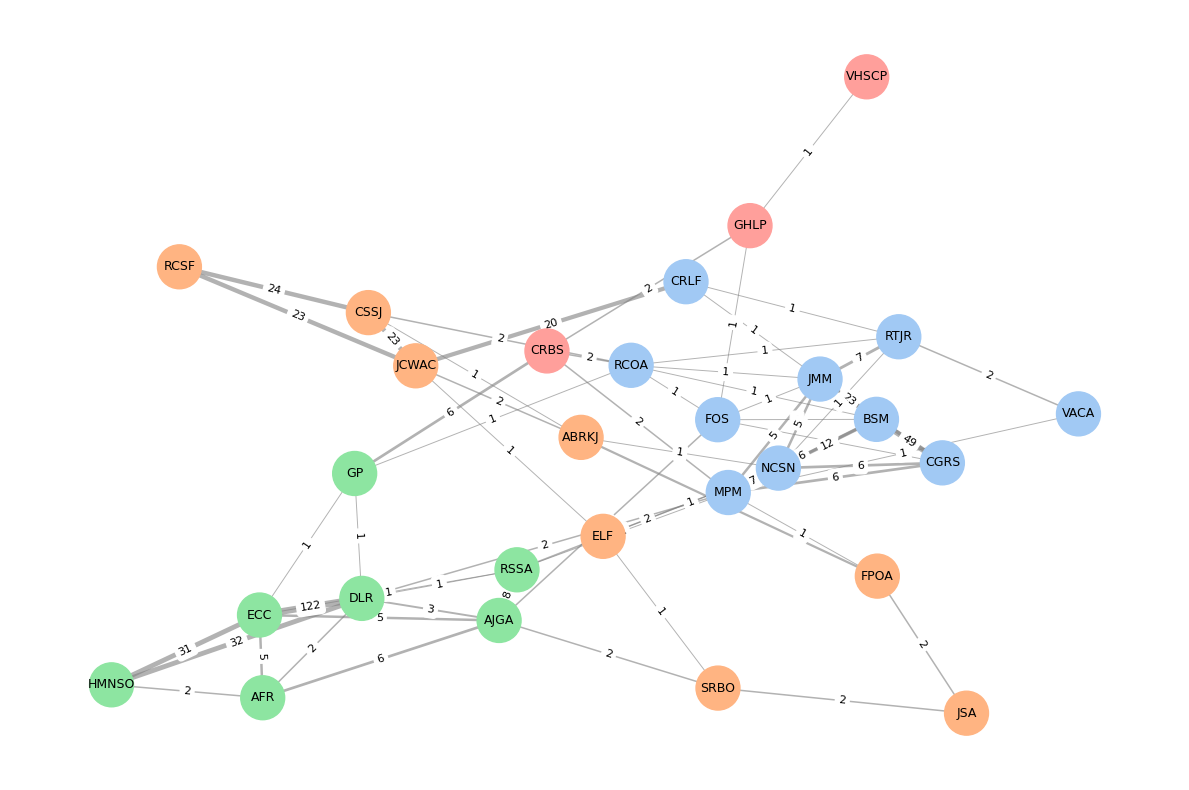

In [25]:
G = nx.from_pandas_edgelist(
    df_clusters_prof,
    source="source",
    target="target",
    edge_attr="n_coauthorships"
)

pos = nx.spring_layout(G, seed=42, k=0.3)

weights = [d["n_coauthorships"] for _, _, d in G.edges(data=True)]
edge_widths = [np.log1p(w) for w in weights]

communities = list(greedy_modularity_communities(G))

communities = sorted(communities, key=lambda c: (-len(c), sorted(c)[0]))

node_to_comm = {}
for idx, comm in enumerate(communities):
    for n in comm:
        node_to_comm[n] = idx

n_comms = len(communities)
palette = sns.color_palette("pastel", n_comms)
node_colors = [palette[node_to_comm[n]] for n in G.nodes]

plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(
    G, pos,
    node_size=1000,
    node_color=node_colors
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color="gray",
    alpha=0.6
)

nx.draw_networkx_labels(
    G, pos,
    font_size=9,
)

edge_labels = nx.get_edge_attributes(G, "n_coauthorships")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis("off")
plt.tight_layout()
plt.savefig(Path(visualization_directory, "coauthorship_network_communities.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorship_network_communities.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorship_network_communities.pdf"), format='pdf', bbox_inches='tight')
plt.show()

### 3.6.1. Clusters of publications

In [26]:
df_clusters_inst = df_productions[["name", "production_id", "institution", "authors", "year"]]
df_clusters_inst = df_clusters_inst[(df_clusters_inst["year"] >= 2014) & (df_clusters_inst["year"] <= 2023)]
df_clusters_inst = df_clusters_inst.drop(columns=["year"])
df_clusters_inst

,name,production_id,institution,authors
3,Jose Maria Nazar David,3,UFJF,"[Wander Gaspar, Regina Maria Maciel Braga, Fer..."
4,Jose Maria Nazar David,4,UFJF,"[Paulo Rezende, Crystiam Kelle Pereira, Fernan..."
5,Jose Maria Nazar David,5,UFJF,"[Gabriella Castro Barbosa Costa, Regina Maria ..."
6,Jose Maria Nazar David,6,UFJF,"[Jacimar Fernandes Tavares, Jose Maria Nazar D..."
8,Jose Maria Nazar David,8,UFJF,"[Crystiam Kelle Pereira, Fernanda Cláudia Alve..."
...,...,...,...,...
230912,Leandro Santiago de Araujo,230926,UFF,"[Zachary Susskind, Igor Dantas Dos Santos Mira..."
230913,Leandro Santiago de Araujo,230927,UFF,"[MELLO, RUI R., Gabriel Antoine Louis Paillard..."
230914,Leandro Santiago de Araujo,230928,UFF,"[Carlos Thadeu Duarte Santos, Anderson Zudio, ..."
230915,Leandro Santiago de Araujo,230929,UFF,"[Felipe Souza, Leandro Santiago de Araujo, Luí..."


In [27]:
all_authors_cited = set()

for authors in df_clusters_inst["authors"]:
    for author in authors:
        all_authors_cited.add(author)

all_authors_cited = sorted(all_authors_cited)
len(all_authors_cited)

123097

In [28]:
all_authors_registered = set()

for author in df_clusters_inst["name"].unique():
    all_authors_registered.add(author)

all_authors_registered = sorted(all_authors_registered)
len(all_authors_registered)

1756

In [29]:
data_author_inst = {
    "name": [],
    "institution": []
}

for author_cited in all_authors_cited:
    if author_cited in all_authors_registered:
        institution = df_clusters_inst[df_clusters_inst["name"] == author_cited]["institution"].values[0]
        data_author_inst["name"].append(author_cited)
        data_author_inst["institution"].append(institution)
    else:
        continue

df_author_inst = pd.DataFrame(data_author_inst)
df_author_inst = df_author_inst.sort_values(by="name").reset_index(drop=True)
df_author_inst

,name,institution
0,Abel Guilhermino da Silva Filho,UFPE
1,Abilio Pereira de Lucena Filho,UFRJ-COMP
2,Adair Santa Catarina,UNIOESTE
3,Ademir Aparecido Constantino,UEM
4,Adenauer Correa Yamin,UFPEL
...,...,...
1751,Álvaro Alvares de Carvalho César Sobrinho,UFAL
1752,Álvaro Freitas Moreira,UFRGS
1753,Álvaro Luiz Fazenda,UNIFESP
1754,Érika Fernandes Cota,UFRGS


In [30]:
df_clusters_inst["authors_institution"] = df_clusters_inst["authors"].apply(
    lambda authors: [df_author_inst[df_author_inst["name"] == author]["institution"].values[0] for author in authors if author in set(df_author_inst["name"])]
)

df_clusters_inst = df_clusters_inst[df_clusters_inst["authors_institution"].apply(len) > 1]
df_clusters_inst["has_all_authors_institution"] = df_clusters_inst.apply(lambda row: len(row["authors_institution"]) == len(row["authors"]), axis=1)
df_clusters_inst

/tmp/ipykernel_4314/1524816165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters_inst["has_all_authors_institution"] = df_clusters_inst.apply(lambda row: len(row["authors_institution"]) == len(row["authors"]), axis=1)


,name,production_id,institution,authors,authors_institution,has_all_authors_institution
3,Jose Maria Nazar David,3,UFJF,"[Wander Gaspar, Regina Maria Maciel Braga, Fer...","[UFJF, UFJF]",False
4,Jose Maria Nazar David,4,UFJF,"[Paulo Rezende, Crystiam Kelle Pereira, Fernan...","[UFJF, UFJF]",False
5,Jose Maria Nazar David,5,UFJF,"[Gabriella Castro Barbosa Costa, Regina Maria ...","[UFJF, UFJF]",False
6,Jose Maria Nazar David,6,UFJF,"[Jacimar Fernandes Tavares, Jose Maria Nazar D...","[UFJF, UFJF, UNIFACS]",False
8,Jose Maria Nazar David,8,UFJF,"[Crystiam Kelle Pereira, Fernanda Cláudia Alve...","[UFJF, UFJF]",False
...,...,...,...,...,...,...
230912,Leandro Santiago de Araujo,230926,UFF,"[Zachary Susskind, Igor Dantas Dos Santos Mira...","[UFF, UFRJ-COMP, UFRJ-INFO, UFRJ-COMP]",False
230913,Leandro Santiago de Araujo,230927,UFF,"[MELLO, RUI R., Gabriel Antoine Louis Paillard...","[UFC, UFF, UFRJ-COMP]",False
230914,Leandro Santiago de Araujo,230928,UFF,"[Carlos Thadeu Duarte Santos, Anderson Zudio, ...","[UFF, UFF]",False
230915,Leandro Santiago de Araujo,230929,UFF,"[Felipe Souza, Leandro Santiago de Araujo, Luí...","[UFF, UFF]",False


In [31]:
df_clusters_inst[df_clusters_inst["has_all_authors_institution"] == True]

,name,production_id,institution,authors,authors_institution,has_all_authors_institution
111,Jose Maria Nazar David,111,UFJF,"[Rita Suzana Pitangueira Maciel, Jose Maria Na...","[UFBA, UFJF, UFBA, UFJF]",True
201,Jose Maria Nazar David,201,UFJF,"[Rita Suzana Pitangueira Maciel, Jose Maria Na...","[UFBA, UFJF, UFBA, UFJF]",True
219,Jose Maria Nazar David,219,UFJF,"[Jose Maria Nazar David, André Pimenta Freire]","[UFJF, UFLA]",True
223,Saulo Moraes Villela,223,UFJF,"[Saulo Moraes Villela, Saul de Castro Leite, R...","[UFJF, UFABC, UFJF]",True
241,Saulo Moraes Villela,241,UFJF,"[Saulo Moraes Villela, Saul de Castro Leite, R...","[UFJF, UFABC, UFJF]",True
...,...,...,...,...,...,...
230075,Troy Costa Kohwalter,230089,UFF,"[Troy Costa Kohwalter, Leonardo Gresta Paulino...","[UFF, UFF, UFF]",True
230789,Luciana Cardoso de Castro Salgado,230803,UFF,"[Ingrid Teixeira Monteiro, Luciana Cardoso de ...","[UFC, UFF, UFPA, UFC, PUC-RIO]",True
230810,Luciana Cardoso de Castro Salgado,230824,UFF,"[Roberto Pereira, Isabela Gasparini, Luciana C...","[UFPR, UDESC, UFF]",True
230811,Luciana Cardoso de Castro Salgado,230825,UFF,"[Luciana Cardoso de Castro Salgado, Isabela Ga...","[UFF, UDESC, UFPR]",True


In [32]:
df_clusters_inst[df_clusters_inst["has_all_authors_institution"] == True]["authors_institution"].apply(len).value_counts()

authors_institution
2    930
3    700
4    313
5     74
6     37
7      9
Name: count, dtype: int64

In [33]:
df_clusters_inst_relations = df_clusters_inst[["production_id", "authors_institution"]]
df_clusters_inst_relations

,production_id,authors_institution
3,3,"[UFJF, UFJF]"
4,4,"[UFJF, UFJF]"
5,5,"[UFJF, UFJF]"
6,6,"[UFJF, UFJF, UNIFACS]"
8,8,"[UFJF, UFJF]"
...,...,...
230912,230926,"[UFF, UFRJ-COMP, UFRJ-INFO, UFRJ-COMP]"
230913,230927,"[UFC, UFF, UFRJ-COMP]"
230914,230928,"[UFF, UFF]"
230915,230929,"[UFF, UFF]"


In [34]:
def powerset(iterable, degree):
    s = list(iterable)
    powerset_list = chain.from_iterable(combinations(s, r) for r in range(len(s) + 1))
    return [p for p in powerset_list if len(p) == degree]

In [35]:
inst_relations = {}

for index, row in df_clusters_inst_relations.iterrows():
    institutions = row["authors_institution"]
    if len(institutions) < 2:
        continue
    pairs = powerset(institutions, 2)
    for pair in pairs:
        pair = tuple(sorted(pair))
        if pair in inst_relations:
            inst_relations[pair] += 1
        else:
            inst_relations[pair] = 1

len(inst_relations)

1249

In [36]:
data_inst_relations = {
    "source": [],
    "target": [],
    "n_coauthorships": []
}

for (inst1, inst2), n_coauth in inst_relations.items():
    data_inst_relations["source"].append(inst1)
    data_inst_relations["target"].append(inst2)
    data_inst_relations["n_coauthorships"].append(n_coauth)

df_inst_relations = pd.DataFrame(data_inst_relations)
df_inst_relations = df_inst_relations.sort_values(by="n_coauthorships", ascending=False).reset_index(drop=True)
df_inst_relations

,source,target,n_coauthorships
0,UFPEL,UFPEL,4804
1,UFMG,UFMG,3288
2,UFC,UFC,2684
3,UFRGS,UFRGS,2484
4,UFMA,UFMA,2460
...,...,...,...
1244,UNIRIO,UNIVALI,1
1245,UFAM,UFG,1
1246,UFRGS,UNIVALI,1
1247,FUFSE,UFABC,1


In [37]:
df_inst_relations_cut = df_inst_relations[df_inst_relations["source"] != df_inst_relations["target"]]
df_inst_relations_cut = df_inst_relations_cut[df_inst_relations_cut["n_coauthorships"] >= 400]
df_inst_relations_cut

,source,target,n_coauthorships
19,UFSCAR,USP-SC,845
20,UFPE,UPE,836
22,UFAL,USP-SC,797
25,UFRJ-COMP,UFRJ-INFO,746
28,UFPE,UFRN,689
29,UFMG,UFV,649
30,UFPEL,UFRGS,642
31,UFF,UFRJ-COMP,638
32,PUC-RIO,UFMA,629
33,UFMG,UNICAMP,616


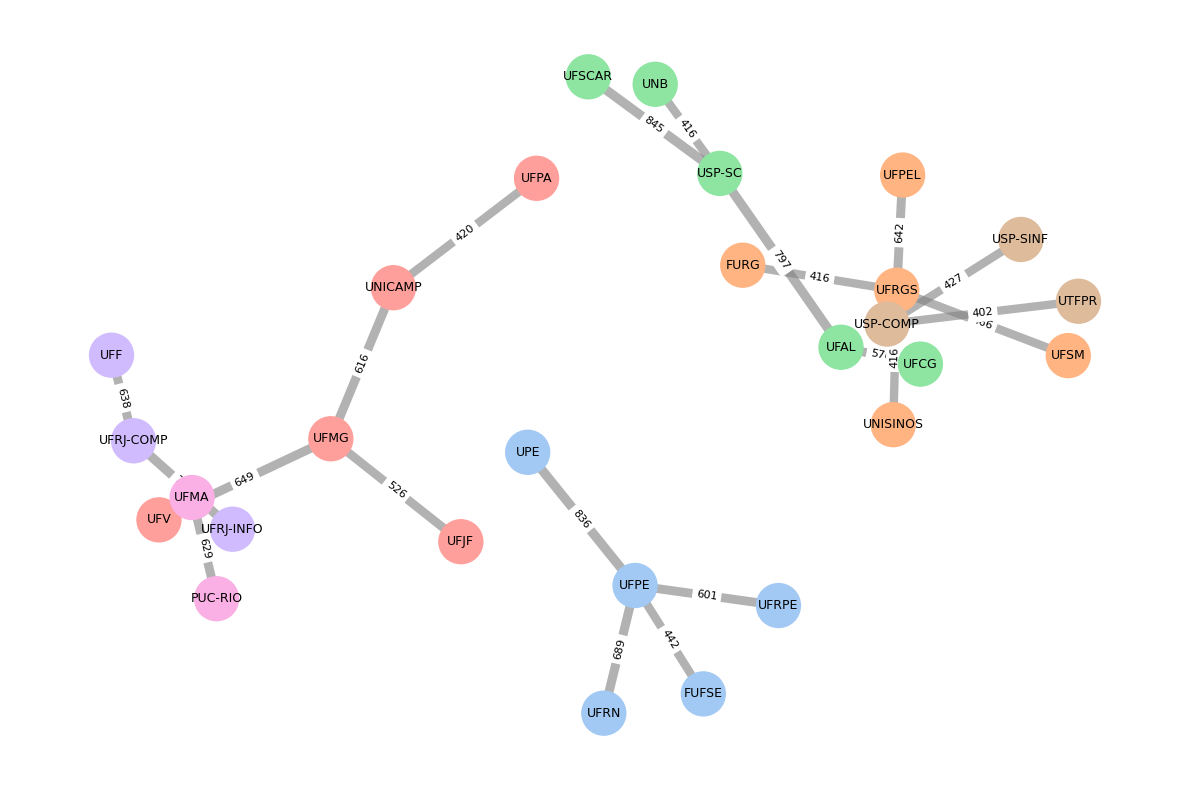

In [38]:
G = nx.from_pandas_edgelist(
    df_inst_relations_cut,
    source="source",
    target="target",
    edge_attr="n_coauthorships"
)

pos = nx.spring_layout(G, k=0.8, iterations=80)

weights = [d["n_coauthorships"] for _, _, d in G.edges(data=True)]
edge_widths = [np.log1p(w) for w in weights]

communities = list(greedy_modularity_communities(G))

communities = sorted(communities, key=lambda c: (-len(c), sorted(c)[0]))

node_to_comm = {}
for idx, comm in enumerate(communities):
    for n in comm:
        node_to_comm[n] = idx

n_comms = len(communities)
palette = sns.color_palette("pastel", n_comms)
node_colors = [palette[node_to_comm[n]] for n in G.nodes]

plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(
    G, pos,
    node_size=1000,
    node_color=node_colors
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color="gray",
    alpha=0.6,
    
)

nx.draw_networkx_labels(
    G, pos,
    font_size=9,
)

edge_labels = nx.get_edge_attributes(G, "n_coauthorships")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis("off")
plt.tight_layout()
plt.savefig(Path(visualization_directory, "coauthorship_institutions_communities.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorship_institutions_communities.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorship_institutions_communities.pdf"), format='pdf', bbox_inches='tight')
plt.show()

## 3.7. Sankey of researchers

In [39]:
initials = df_clusters_prof["source"].tolist() + df_clusters_prof["target"].tolist()
initials = sorted(list(set(initials)))
print(len(initials))
initials

28


['ABRKJ',
 'AFR',
 'AJGA',
 'BSM',
 'CGRS',
 'CRBS',
 'CRLF',
 'CSSJ',
 'DLR',
 'ECC',
 'ELF',
 'FOS',
 'FPOA',
 'GHLP',
 'GP',
 'HMNSO',
 'JCWAC',
 'JMM',
 'JSA',
 'MPM',
 'NCSN',
 'RCOA',
 'RCSF',
 'RSSA',
 'RTJR',
 'SRBO',
 'VACA',
 'VHSCP']

In [40]:
labels = []

for initial in initials:
    labels.append(f"S-{initial}")

for initial in initials:
    labels.append(f"T-{initial}")

labels

['S-ABRKJ',
 'S-AFR',
 'S-AJGA',
 'S-BSM',
 'S-CGRS',
 'S-CRBS',
 'S-CRLF',
 'S-CSSJ',
 'S-DLR',
 'S-ECC',
 'S-ELF',
 'S-FOS',
 'S-FPOA',
 'S-GHLP',
 'S-GP',
 'S-HMNSO',
 'S-JCWAC',
 'S-JMM',
 'S-JSA',
 'S-MPM',
 'S-NCSN',
 'S-RCOA',
 'S-RCSF',
 'S-RSSA',
 'S-RTJR',
 'S-SRBO',
 'S-VACA',
 'S-VHSCP',
 'T-ABRKJ',
 'T-AFR',
 'T-AJGA',
 'T-BSM',
 'T-CGRS',
 'T-CRBS',
 'T-CRLF',
 'T-CSSJ',
 'T-DLR',
 'T-ECC',
 'T-ELF',
 'T-FOS',
 'T-FPOA',
 'T-GHLP',
 'T-GP',
 'T-HMNSO',
 'T-JCWAC',
 'T-JMM',
 'T-JSA',
 'T-MPM',
 'T-NCSN',
 'T-RCOA',
 'T-RCSF',
 'T-RSSA',
 'T-RTJR',
 'T-SRBO',
 'T-VACA',
 'T-VHSCP']

In [41]:
labels_clean = [label.split('-')[1] for label in labels]

In [42]:
colors = get_colors(len(initials))

color_mapping = {initial: color for initial, color in zip(labels, colors+colors)}
color_mapping

{'S-ABRKJ': '#db5f57',
 'S-AFR': '#db7b57',
 'S-AJGA': '#db9757',
 'S-BSM': '#dbb457',
 'S-CGRS': '#dbd057',
 'S-CRBS': '#cadb57',
 'S-CRLF': '#addb57',
 'S-CSSJ': '#91db57',
 'S-DLR': '#75db57',
 'S-ECC': '#58db57',
 'S-ELF': '#57db72',
 'S-FOS': '#57db8e',
 'S-FPOA': '#57dbaa',
 'S-GHLP': '#57dbc7',
 'S-GP': '#57d3db',
 'S-HMNSO': '#57b7db',
 'S-JCWAC': '#579bdb',
 'S-JMM': '#577edb',
 'S-JSA': '#5762db',
 'S-MPM': '#6857db',
 'S-NCSN': '#8557db',
 'S-RCOA': '#a157db',
 'S-RCSF': '#bd57db',
 'S-RSSA': '#da57db',
 'S-RTJR': '#db57c0',
 'S-SRBO': '#db57a4',
 'S-VACA': '#db5788',
 'S-VHSCP': '#db576b',
 'T-ABRKJ': '#db5f57',
 'T-AFR': '#db7b57',
 'T-AJGA': '#db9757',
 'T-BSM': '#dbb457',
 'T-CGRS': '#dbd057',
 'T-CRBS': '#cadb57',
 'T-CRLF': '#addb57',
 'T-CSSJ': '#91db57',
 'T-DLR': '#75db57',
 'T-ECC': '#58db57',
 'T-ELF': '#57db72',
 'T-FOS': '#57db8e',
 'T-FPOA': '#57dbaa',
 'T-GHLP': '#57dbc7',
 'T-GP': '#57d3db',
 'T-HMNSO': '#57b7db',
 'T-JCWAC': '#579bdb',
 'T-JMM': '#577edb',
 

In [43]:
def combine_rgb(rgb_colors):
    num_colors = len(rgb_colors)
    if num_colors == 0:
        return (0, 0, 0)
    
    avg_r = sum(c[0] for c in rgb_colors) // num_colors
    avg_g = sum(c[1] for c in rgb_colors) // num_colors
    avg_b = sum(c[2] for c in rgb_colors) // num_colors
    return (avg_r, avg_g, avg_b)

In [44]:
def hex2rgb(hex_color: str):
    hex_color = hex_color.lstrip("#")
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

In [45]:
edge_colors = []

for i, row in df_clusters_prof.iterrows():
    color_1 = color_mapping[f"S-{row['source']}"]
    color_2 = color_mapping[f"T-{row['target']}"]

    color_1 = hex2rgb(color_1)
    color_2 = hex2rgb(color_2)

    edge_color = combine_rgb([color_1, color_2])
    edge_colors.append(f"rgb{edge_color}")

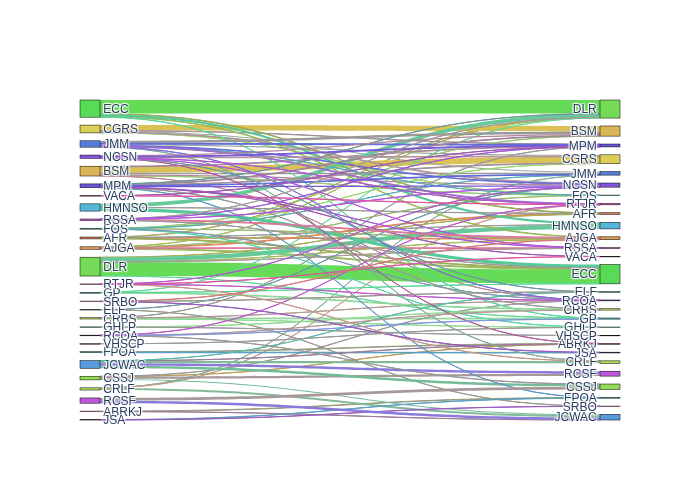

In [46]:
source_indices = [labels.index(f"S-{src}") for src in df_clusters_prof["source"]]
source_colors = [color_mapping[f"S-{src}"] for src in df_clusters_prof["source"]]

target_indices = [labels.index(f"T-{tgt}") for tgt in df_clusters_prof["target"]]
target_colors = [color_mapping[f"T-{tgt}"] for tgt in df_clusters_prof["target"]]

values = df_clusters_prof["n_coauthorships"].tolist()

fig_sankey = go.Figure(
    data=[
        go.Sankey(
            node = dict(
                pad = 15,
                thickness = 20,
                line = dict(color="black", width=0.5),
                label = labels_clean,
                color = list(color_mapping.values())
            ),
            link = dict(
                source = source_indices,
                target = target_indices,
                value = values,
                color = edge_colors
            )
        )
    ]
)

fig_sankey.update_layout(
    width=1920,
    height=1080,
)

fig_sankey.show(renderer="png")

### 3.7.1. One-to-many sankey

In [47]:
df_clusters_prof

,source,target,n_coauthorships
0,ABRKJ,FPOA,4
1,ABRKJ,JCWAC,1
2,AFR,AJGA,6
3,AFR,DLR,3
4,AFR,ECC,7
...,...,...,...
109,SRBO,ELF,1
110,SRBO,JSA,2
111,VACA,MPM,1
112,VACA,RTJR,2


In [48]:
for s_prof in sorted(df_clusters_prof["source"].unique()):
    df_clusters_prof_unique = df_clusters_prof[df_clusters_prof["source"] == s_prof]

    source_indices = [labels.index(f"S-{src}") for src in df_clusters_prof_unique["source"]]
    source_colors = [color_mapping[f"S-{src}"] for src in df_clusters_prof_unique["source"]]

    target_indices = [labels.index(f"T-{tgt}") for tgt in df_clusters_prof_unique["target"]]
    target_colors = [color_mapping[f"T-{tgt}"] for tgt in df_clusters_prof_unique["target"]]

    values = df_clusters_prof_unique["n_coauthorships"].tolist()

    fig_sankey = go.Figure(
        data=[
            go.Sankey(
                node = dict(
                    pad = 15,
                    thickness = 20,
                    line = dict(color="black", width=0.5),
                    label = labels_clean,
                    color = list(color_mapping.values())
                ),
                link = dict(
                    source = source_indices,
                    target = target_indices,
                    value = values,
                    color = edge_colors
                )
            )
        ]
    )

    fig_sankey.update_layout(
        width=1280,
        height=720,
        title_text=f"Coautorias do professor {s_prof}",
        title_x=0.5
    )

    fig_sankey.write_image(Path(visualization_directory, "sankey", f"sankey_{s_prof}.png"), scale=2)

## 3.8. Sankey of institution coauthorship

In [49]:
institution_reference = {row["name"]: row["institution"] for _, row in df_productions.iterrows()}

In [50]:
# df_institution_coauth = df_productions[["production_id", "authors"]]
df_institution_coauth = df_productions[["production_id", "authors", "year"]]
df_institution_coauth = df_institution_coauth[df_institution_coauth["year"] == 2023]
df_institution_coauth = df_institution_coauth.drop(columns=["year"])
df_institution_coauth["institutions"] = df_institution_coauth["authors"].apply(lambda authors: [institution_reference[author] for author in authors if author in institution_reference])
df_institution_coauth = df_institution_coauth.drop(columns=["authors"])
df_institution_coauth["institutions"] = df_institution_coauth["institutions"].apply(set)
df_institution_coauth = df_institution_coauth[df_institution_coauth["institutions"].apply(len) > 1]
df_institution_coauth.to_csv(Path(visualization_directory, "institution_coauthorships.csv"), index=False)
df_institution_coauth

,production_id,institutions
192,192,"{UFJF, UFSC}"
196,196,"{UFSC, UFJF}"
213,213,"{UFJF, UFG}"
234,234,"{UFJF, UFV}"
394,394,"{UFJF, UFV}"
...,...,...
230773,230787,"{CEFET, UFF}"
230794,230808,"{UNB, UFF}"
230887,230901,"{UFRJ-COMP, UFRJ-INFO, UFF}"
230890,230904,"{UFRJ-COMP, UFRJ-INFO, UFF}"


In [51]:
df_institution_coauth2 = df_institution_coauth[["institutions"]]
df_institution_coauth2["institutions"] = df_institution_coauth2["institutions"].map(lambda x: " - ".join(x))
df_institution_coauth2 = df_institution_coauth2.groupby("institutions").size().sort_values(ascending=False)
df_institution_coauth2

/tmp/ipykernel_4314/2179286811.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



institutions
FURG - UFPEL                        45
UFV - UFMG                          40
UFSM - UFRGS                        33
UFRJ-COMP - UFRJ-INFO               32
UFPE - UPE                          29
                                    ..
PUC-RS - PUC-PR                      1
USP-SC - UFU                         1
USP-SC - UNICAMP                     1
USP-SC - UNIOESTE - UDESC - UFAM     1
FUFPI - UFAL                         1
Length: 469, dtype: int64

In [52]:
coauths = [coauth.split(" - ") for coauth in df_institution_coauth2.iloc[:8].index.to_list()]

coauths_institutions = [institution for coauth in coauths for institution in coauth]
coauths_institutions = set( coauths_institutions )
coauths_institutions

{'FURG',
 'UFAL',
 'UFCG',
 'UFMG',
 'UFMS',
 'UFPE',
 'UFPEL',
 'UFRGS',
 'UFRJ-COMP',
 'UFRJ-INFO',
 'UFSM',
 'UFV',
 'UPE',
 'USP-COMP',
 'USP-SC',
 'USP-SINF'}

In [53]:
df_institution_coauth3 = df_institution_coauth.copy()

df_institution_coauth3["belongs"] = df_institution_coauth3["institutions"].map(lambda x: x.difference(set(coauths_institutions)) == set())
df_institution_coauth = df_institution_coauth3[df_institution_coauth3["belongs"] == True]
df_institution_coauth

,production_id,institutions,belongs
866,866,"{UFV, UFMG}",True
25364,25364,"{USP-SINF, UFMG}",True
25541,25541,"{USP-SINF, UFMG}",True
25543,25543,"{USP-SINF, USP-COMP, UFMG}",True
26577,26577,"{USP-SINF, USP-COMP, UFMG}",True
...,...,...,...
223739,223753,"{USP-SC, USP-SINF}",True
223833,223847,"{USP-SINF, UFMG}",True
223834,223848,"{USP-SINF, USP-COMP}",True
223835,223849,"{USP-SINF, USP-COMP}",True


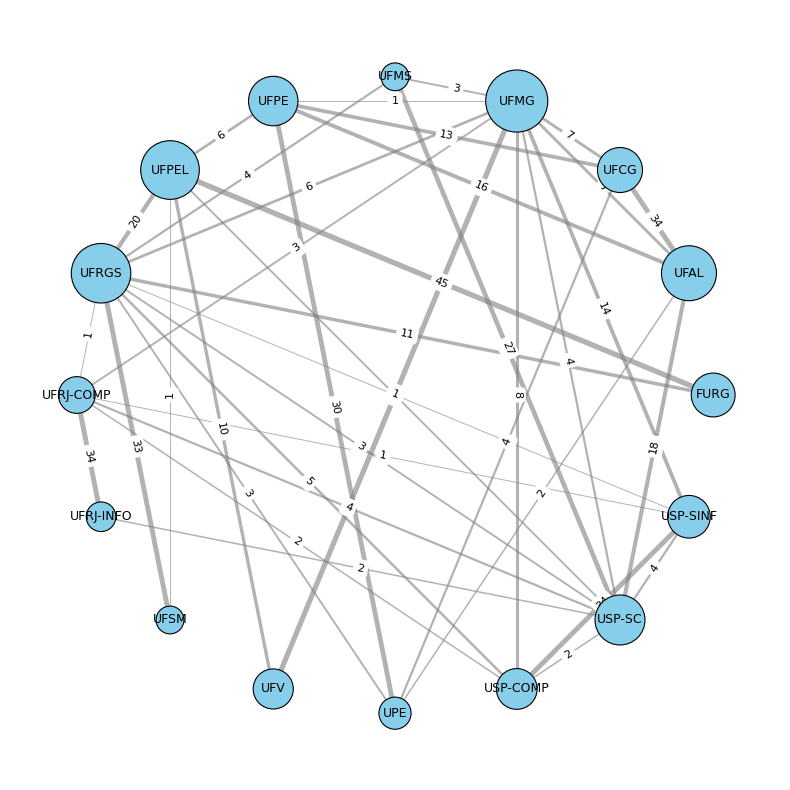

In [54]:
edge_counts = Counter()
all_nodes = set()

for insts in df_institution_coauth["institutions"]:
    unique_insts = {str(x).strip() for x in insts if pd.notna(x) and str(x).strip()}
    all_nodes.update(unique_insts)

    for u, v in combinations(sorted(unique_insts), 2):
        edge_counts[(u, v)] += 1

G = nx.Graph()
G.add_nodes_from(sorted(all_nodes))
for (u, v), w in edge_counts.items():
    G.add_edge(u, v, weight=w)

MIN_W = 1
to_drop = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] < MIN_W]
G.remove_edges_from(to_drop)
G.remove_nodes_from(list(nx.isolates(G)))

# pos = nx.spring_layout(G, seed=42, k=0.25)
pos = nx.circular_layout(G)

weights = [d["weight"] for _, _, d in G.edges(data=True)]
edge_widths = [np.log1p(w) for w in weights] if weights else []

strength = {n: 0 for n in G.nodes}
for u, v, d in G.edges(data=True):
    strength[u] += d["weight"]
    strength[v] += d["weight"]

if strength:
    svals = np.array(list(strength.values()), dtype=float)
    smin, smax = float(svals.min()), float(svals.max())
    if smax > smin:
        sizes = 400 + 1600 * (svals - smin) / (smax - smin)
    else:
        sizes = np.full_like(svals, 800, dtype=float)
    node_sizes = [sizes[list(G.nodes).index(n)] for n in G.nodes]
else:
    node_sizes = 600

fig_institution_coauth = plt.figure(figsize=(8, 8))

nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color="#87CEEB",
    edgecolors="black",
    linewidths=0.8
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color="gray",
    alpha=0.6
)

nx.draw_networkx_labels(G, pos, font_size=9)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis("off")
plt.tight_layout()

fig_institution_coauth.savefig(Path(visualization_directory, "institution_coauthorship_network.png"), dpi=300, bbox_inches='tight')
fig_institution_coauth.savefig(Path(visualization_directory, "institution_coauthorship_network.svg"), format='svg', bbox_inches='tight')
fig_institution_coauth.savefig(Path(visualization_directory, "institution_coauthorship_network.pdf"), format='pdf', bbox_inches='tight')

plt.show()